# Title:

##  Clustering the Countries by performing K-means and   Hierarchical Clustering Algorithms

# Problem Statement
HELP International have been able to raise around $ 10 million. Now the CEO of 
the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make 
decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist 
is to categorise the countries using some socio-economic and health factors that determine the overall 
development of the country. Then you need to suggest the countries which the CEO needs to focus on 
the most.

# Import libraries into the dataset

In [1]:
# for supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# To display data dictionary fully
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 1000)

In [4]:
# For Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [6]:
# For K Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
# For Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Read the csv file/dataset

In [8]:
country_df = pd.read_csv('country-data.csv')
country_df.head() # Checking the top 5 rows of the dataframe

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
# checking botton 5 rows of the dataframe
country_df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [10]:
# Checking the shape of the dataframe
country_df.shape

(167, 10)

In [11]:
# How many types of each data type column exists and total memory usage
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [12]:
# To check the duplicates in the dataset
country_df.duplicated().sum()

0

In [13]:
# To check unique in the each categorical column
country_df.nunique().sort_values()

life_expec    127
total_fer     138
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
gdpp          157
country       167
dtype: int64

In [14]:
# Checking the numerical columns data distribution
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Exploratory Data Analysis (EDA) & Data Cleaning

In [15]:
# To check the null value in each column 
print(country_df.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [16]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**comment**
- Here health, exports, imports are in percentage of gdp.
  Hence, we have to convert these percentage values to actual values.
    

In [17]:
country_df['exports'] = country_df['exports'] * country_df['gdpp']/100
country_df['imports'] = country_df['imports'] * country_df['gdpp']/100
country_df['health'] = country_df['health'] * country_df['gdpp']/100

In [18]:
country_df.head() # Lets check data after conversion

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Bivariate Analysis

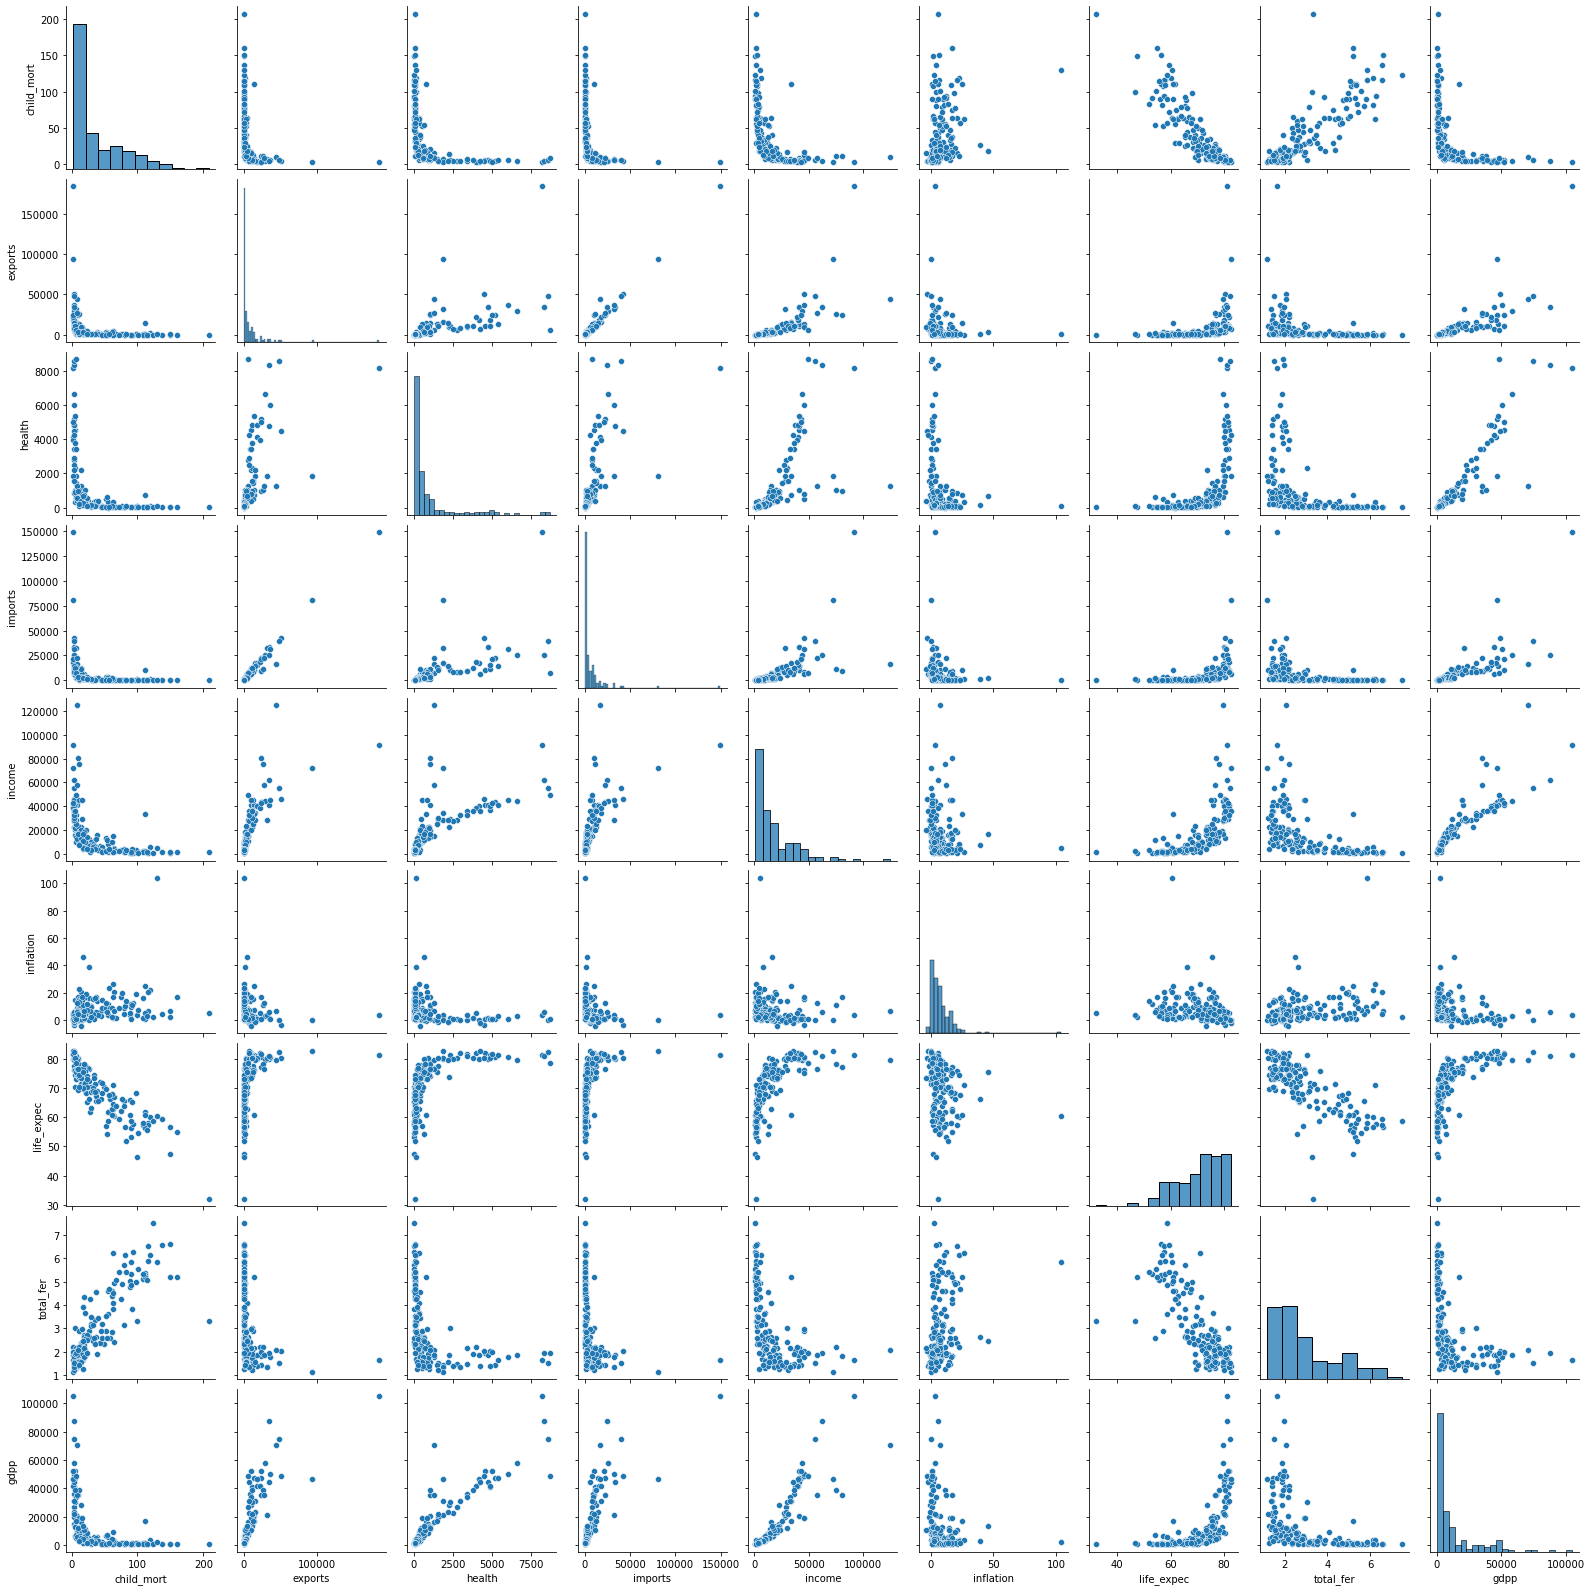

In [19]:
sns.pairplot(country_df)
plt.show( )

**Comment**
- gdpp is linearly related with exports, health, imports, income. (positively correlated)
- child_mort is negatively correlated with life_expec (greater the child mortality, lesser the life expectancy)and positively correlated with total_fer

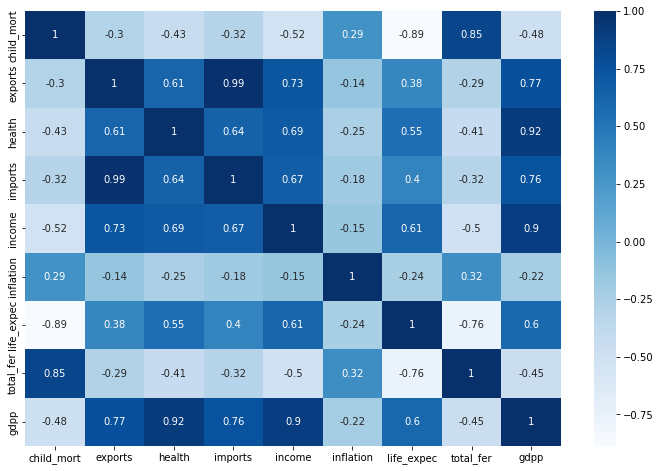

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(country_df.corr( ),cmap='Blues',annot=True)
plt.show( )

**Comment:**

Following feature pairs are highly correlated (positively or negatively)
- imports and exports (correlation factor = 0.99)
- health and gdpp (correlation factor = 0.92)
- income and gdpp (correlation factor = 0.9)
- life_expce and child_mort (correlation factor = -0.89)
- total_fer and child_mort (correlation factor = 0.85)

###  univariate Analysis

In [21]:
numerical_cols = list(country_df.columns) # Get all column names
numerical_cols.remove('country') # Remove country as its not numerical
numerical_cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

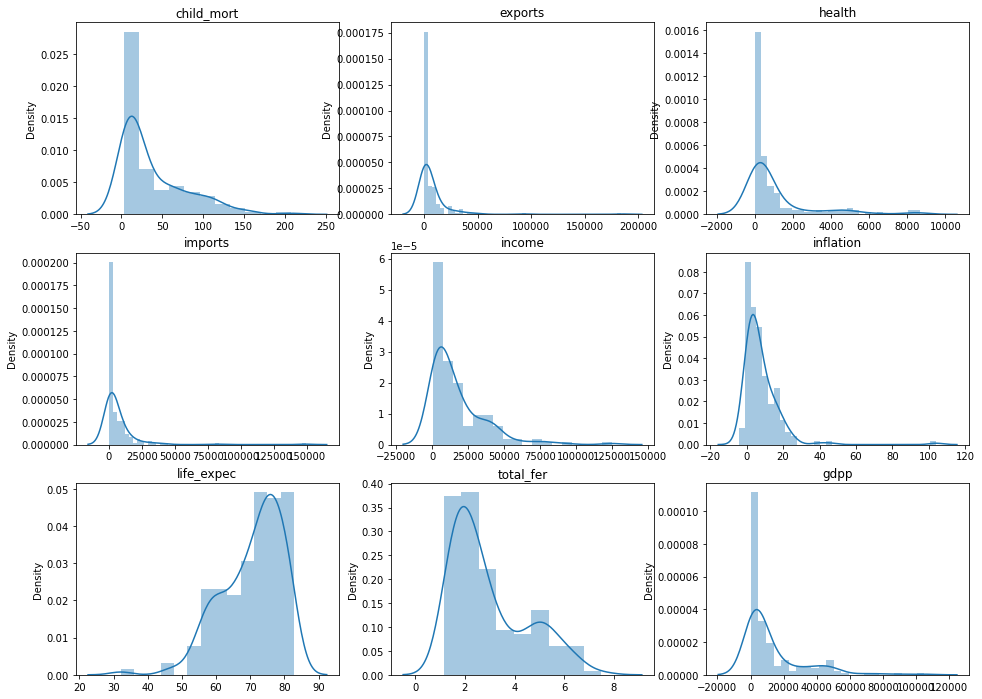

In [22]:
# Distplot
plt.figure(figsize=[16,12])
i=1 # to track the ith plot in the subplot
for col in numerical_cols:
    plt.subplot(3,3,i)
    sns.distplot(country_df[col])
    plt.title(col)
    plt.xlabel('')    
    i+=1

**comment** 
- Expect life expecteancy(life_expec) all the features are right-skewwd.

In [23]:
# Visualize bottom 10 countries w.r.t exports, imports, health, inflation, life_expectancy and total fertility rate

def plot_bottom10_countries(y_column, sort_order=True, truncate_string=False):
    sorted_df = country_df[['country',y_column]].sort_values(y_column, ascending = sort_order).head(10) # get bottom 10
    sorted_df[y_column] = sorted_df[y_column].round(2) # roundoff to 2 decimals
    if truncate_string: # truncate only for subplots proper visualization purpose
        sorted_df.loc[sorted_df['country'].str.contains('Central African Republic'),'country'] = 'Cent.Afr.Repub.'
        sorted_df.loc[sorted_df['country'].str.contains('Congo'),'country'] = 'Congo'
        sorted_df.loc[sorted_df['country'].str.contains('Equatorial Guinea'),'country'] = 'Guinea'
        
    ax = sns.barplot(x='country', y=y_column, data= sorted_df)
    for each_bar in ax.patches:
        ax.annotate(str(each_bar.get_height()), (each_bar.get_x() * 1.01 , each_bar.get_height() * 1.01))
    plt.ylabel(y_column)
    plt.xlabel('10 Countries which have poor %s' %y_column)
    ax.set_xticklabels(sorted_df['country'], rotation=45, ha='center')

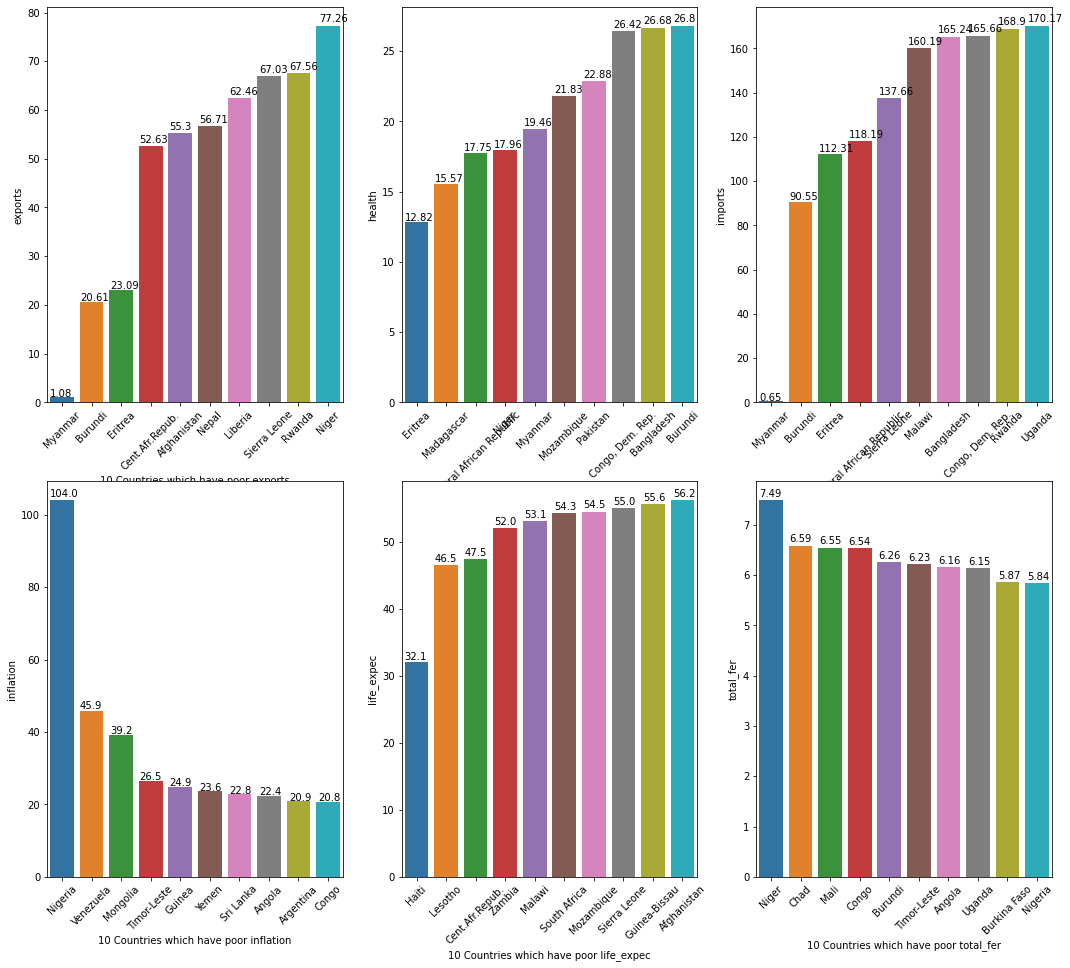

In [24]:

plt.figure(figsize = (18,16))
plt.subplot(2,3,1)
plot_bottom10_countries("exports", sort_order=True, truncate_string=True)
plt.subplot(2,3,2)
plot_bottom10_countries("health")
plt.subplot(2,3,3)
plot_bottom10_countries("imports")
plt.subplot(2,3,4)
plot_bottom10_countries("inflation", sort_order=False, truncate_string=True)
plt.subplot(2,3,5)
plot_bottom10_countries("life_expec", sort_order=True, truncate_string=True)
plt.subplot(2,3,6)
plot_bottom10_countries("total_fer", sort_order=False, truncate_string=True)
plt.show()

### comment:

- exports, health follow GDPP and income plots pattern and the countries which had low GDPP seem to have low exports.
- imports show a different trend indicating that these countries manufacture a lot of goods sufficiently.
- inflation shows countries that are not stable and not self-sufficient and suffering from other political and social issues. 

# Handiling Outliers

In [25]:
def boxplot_for_outlier_analysis():
    plt.figure(figsize=[16,12])
    i=1 # to track the ith plot in the subplot
    for col in numerical_cols:
        plt.subplot(3,3,i)
        sns.boxplot(y=country_df[col])
        plt.title(col)
        plt.ylabel('')
        i+=1

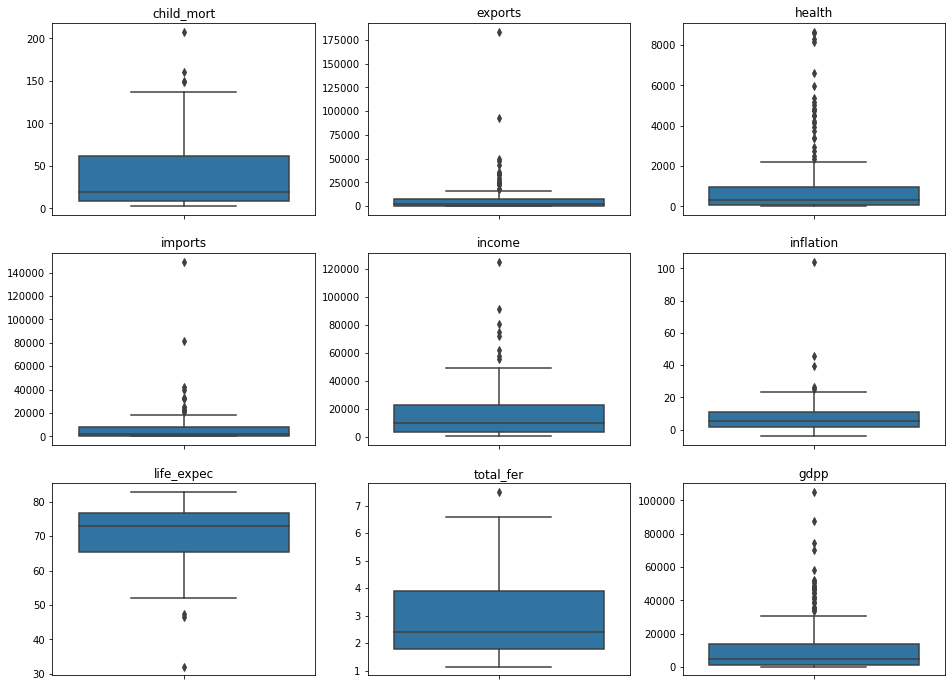

In [26]:
boxplot_for_outlier_analysis()

There are different ranges in capping the outliers:
- Soft range: 1th and 99th percentile.
- Mid range: 5th and 95th percentile.
- 25th and 75th percentile.

We will be doing **Soft capping** as the data points are few and the capping should not influence the clusters much.

In [27]:
higher_outlier_cols = ['exports','imports','health','income','total_fer','gdpp']

for col in higher_outlier_cols:
    Q4 = country_df[col].quantile(0.99) # Get 99th quantile
    country_df.loc[country_df[col] >= Q4, col] = Q4 # outlier capping

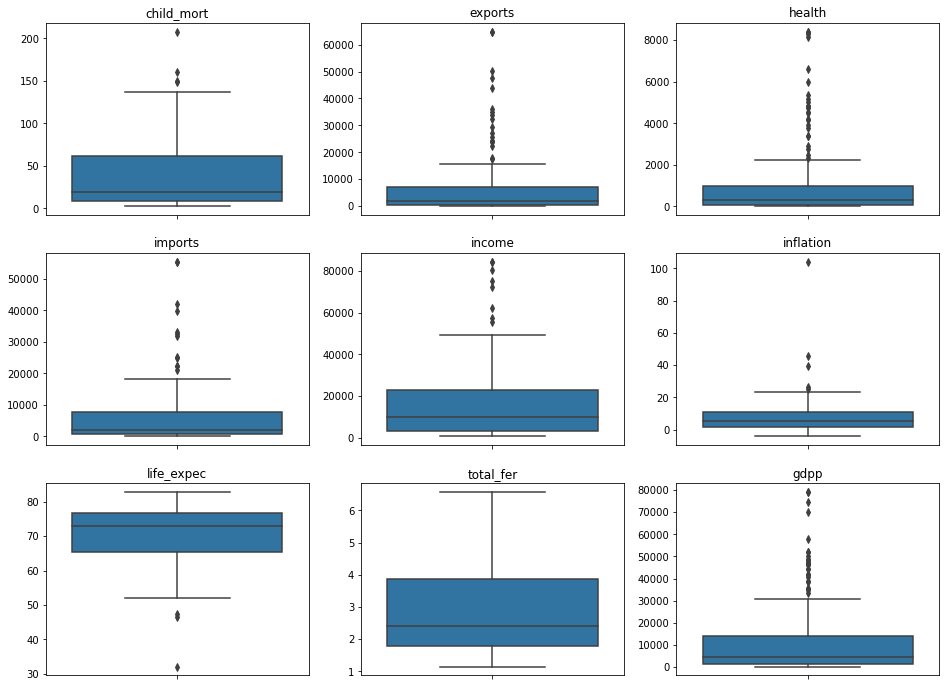

In [28]:
boxplot_for_outlier_analysis()

In [29]:
country_df.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.781832,70.555689,2.942259,12756.826347
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,10.570704,8.893172,1.498340,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.200000,110.224800,36.502560,211.005600,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


# Hopkins test

In [30]:
#Calculating the Hopkins statistic

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [31]:
hopkins(country_df[numerical_cols])

0.9720207835721586

**comment**
- Hopkins Statistic over .70 is a good score that indicated that the data is good for cluster analysis. 
- A 'Hopkins Statistic' value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.


In [32]:
# Scaling on numerical features

scaler = StandardScaler() # instantiate scaler

country_df_scaled = scaler.fit_transform(country_df[numerical_cols]) # fit parameters to have mean 0 and SD as 1 and transform data accordingly
country_df_scaled = pd.DataFrame(country_df_scaled, columns = numerical_cols) # convert to dataframe
country_df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.543736,-0.032042
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.452874,-0.503105,-0.458563,-0.776821,-0.489784,-0.852161,0.373359,-0.563175
163,-0.526514,-0.236420,-0.219189,-0.372256,-0.019971,3.616865,0.546361,-0.316136,0.042765
164,-0.372315,-0.491607,-0.540250,-0.513337,-0.690802,0.409732,0.286958,-0.664231,-0.658699
165,0.448417,-0.539950,-0.552429,-0.577202,-0.691361,1.500916,-0.344633,1.156572,-0.658699


#  K-means algorithm 

### Metrics to choose the value of K
- There are two common approaches that help to find k:

1. Elbow method
2. Silhouette Analysis

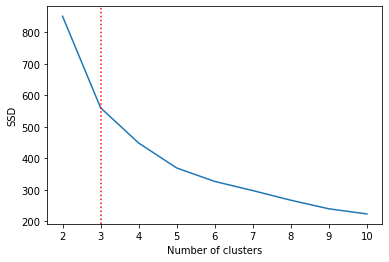

In [33]:
# Elbow method
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_df_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1]) # plot the SSDs for each n_clusters
ax.axvline(3, ls='dotted',color='red') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

For k_clusters=2, the silhouette score is 0.478554
For k_clusters=3, the silhouette score is 0.423307
For k_clusters=4, the silhouette score is 0.409140
For k_clusters=5, the silhouette score is 0.415465
For k_clusters=6, the silhouette score is 0.316661
For k_clusters=7, the silhouette score is 0.299642
For k_clusters=8, the silhouette score is 0.264868
For k_clusters=9, the silhouette score is 0.298365
For k_clusters=10, the silhouette score is 0.257806


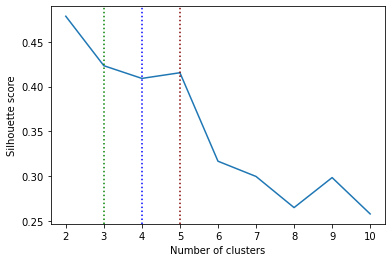

In [34]:
# Silhouette score

from sklearn.metrics import silhouette_score
silhouette_scores_list = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_df_scaled) # intialise kmeans
    silhouette_avg = silhouette_score(country_df_scaled, kmean.labels_) # silhouette score
    silhouette_scores_list.append([k, silhouette_avg])
    print("For k_clusters={0}, the silhouette score is {1:2f}".format(k, silhouette_avg))
    
temp = pd.DataFrame(silhouette_scores_list)    
ax = plt.axes()
ax.plot(temp[0], temp[1])
ax.axvline(3, ls='dotted',color='green') # elbow formed as 3
ax.axvline(4, ls='dotted',color='blue') # elbow formed as 3
ax.axvline(5, ls='dotted',color='maroon') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

**comment**:

- The silhouette score is maximum when k is 2 which is 0.47
- 2 is very less number of clusters and countries within the 2 clusters might be very different.

So lets look at the next optimal silhouette score.

- 3,4,5 seem to have good silhouette scores. As k increases, silhouette score decreases and hence these will have definitely lesser sihouette score than that of k=2.
- Though elbow curve indicate 3 is optimal number and silhouette score of 3 seem to be the best, lets use K-means algorithm for k=3,4,5 and see which value of k gives us better cluster profiling.

In [35]:
# Function for all steps of Kmean Clustering; Call with K=3,4,5
def K_means_model(k):
    kmean = KMeans(n_clusters = k, random_state = 50+k)
    kmean.fit(country_df_scaled)
    country_df_kmean = country_df.copy() # copy the actual data into a new dataframe to explain the cluster profiling
    label  = pd.DataFrame(kmean.labels_, columns= ['k_means_cluster_label'])
    country_df_kmean = pd.concat([country_df_kmean, label], axis =1) # assign the countries with the cluster labels.
    print("Number of countries in each cluster(k=%s):" %k)
    print(country_df_kmean.k_means_cluster_label.value_counts())# shows how many countries are in each cluster
    return(country_df_kmean) # returns clustered labelled dataset for further analysis

In [36]:
# Created Models are available globally to access inside cluster profiling functions
k_3_model = K_means_model(3) # K means model with 3 clusters
k_4_model = K_means_model(4) # K means model with 4 clusters
k_5_model = K_means_model(5) # K means model with 5 clusters

Number of countries in each cluster(k=3):
1    92
0    48
2    27
Name: k_means_cluster_label, dtype: int64
Number of countries in each cluster(k=4):
2    80
1    48
0    30
3     9
Name: k_means_cluster_label, dtype: int64
Number of countries in each cluster(k=5):
4    78
0    47
1    30
2     9
3     3
Name: k_means_cluster_label, dtype: int64


In [37]:
# Function for Profiling Clusters to plot scatter plots
def clusters_scatter_plots(col1, col2):
    plt.figure(figsize=(18,8))
    plt.subplot(2,2,1)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_3_model, palette=['blue','green','red'])
    plt.subplot(2,2,2)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_4_model, palette=['orange','blue','green','red'])
    plt.subplot(2,2,3)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_5_model, palette=['red','orange','maroon','green','blue'])
    

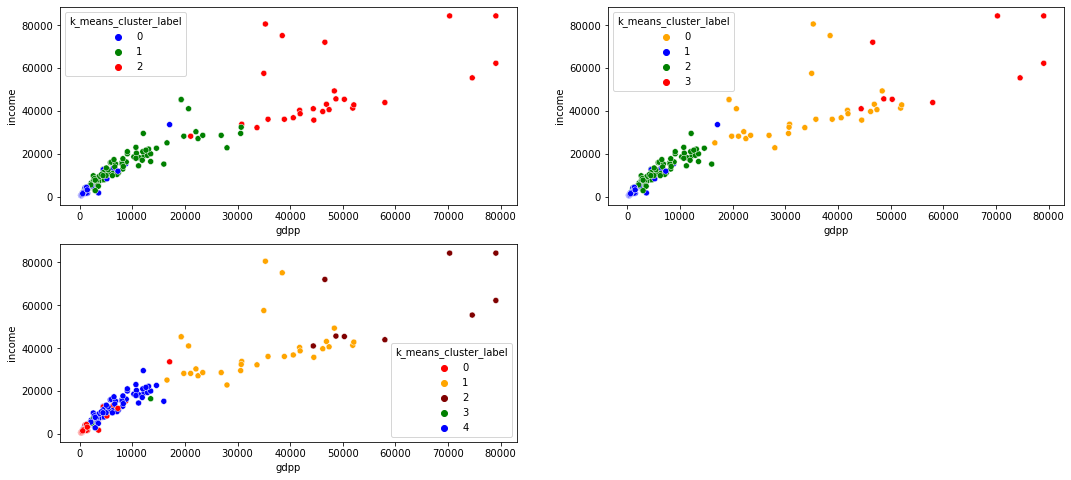

In [38]:
clusters_scatter_plots('gdpp','income')

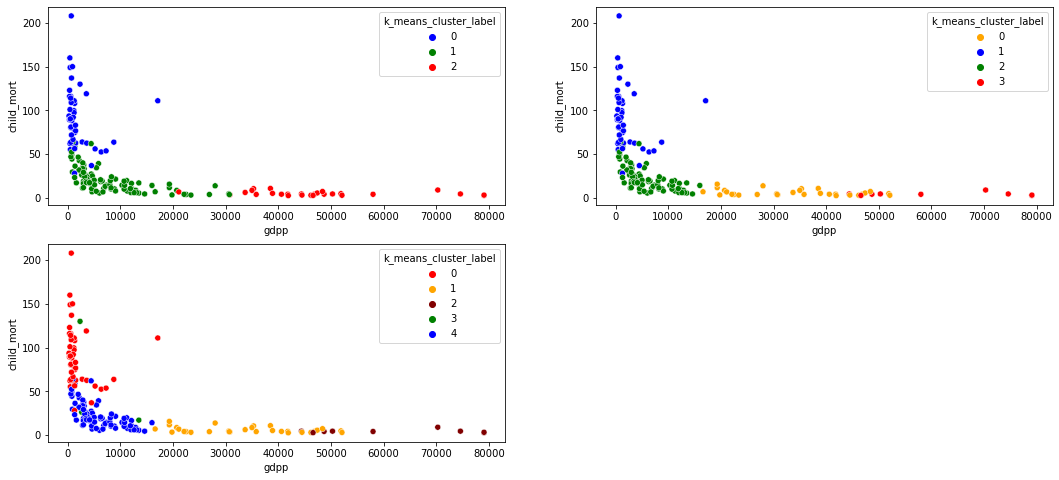

In [39]:
clusters_scatter_plots('gdpp','child_mort')

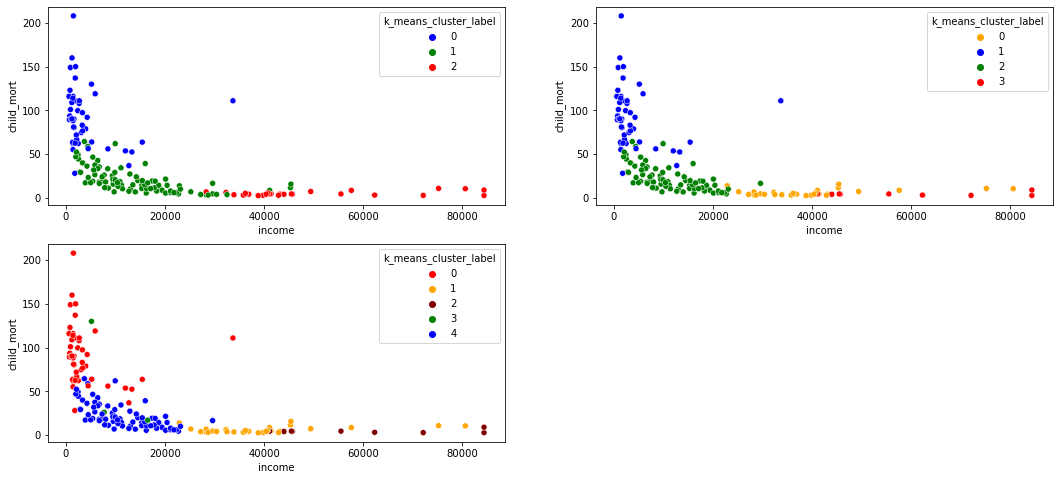

In [40]:
clusters_scatter_plots('income','child_mort')

In [41]:
# Function for Profiling Clusters to plot box plots
def clusters_box_plots(column_name, logy=False):
    #plt.figure(figsize=(18,8))
    
    if logy:
        i=1
    else:
        i=0
    
    plt.subplot(2+i,2,1)
    sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_3_model, palette=['red','green','blue'])
    if logy:
        plt.subplot(3,2,2)
        sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_3_model, palette=['red','green','blue'])
        plt.yscale('log')

    plt.subplot(2+i,2,2+i)
    sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_4_model, palette=['orange', 'blue','green','red'])    
    if logy:
        plt.subplot(3,2,4)
        sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_4_model, palette=['orange','blue','green','red'])
        plt.yscale('log')
        
    plt.subplot(2+i,2,3+i+i)
    sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_5_model, palette=['red','blue','maroon','green','orange'])
    if logy:
        plt.subplot(3,2,6)
        sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_5_model, palette=['red','blue','maroon','green','orange'])
        plt.yscale('log') 

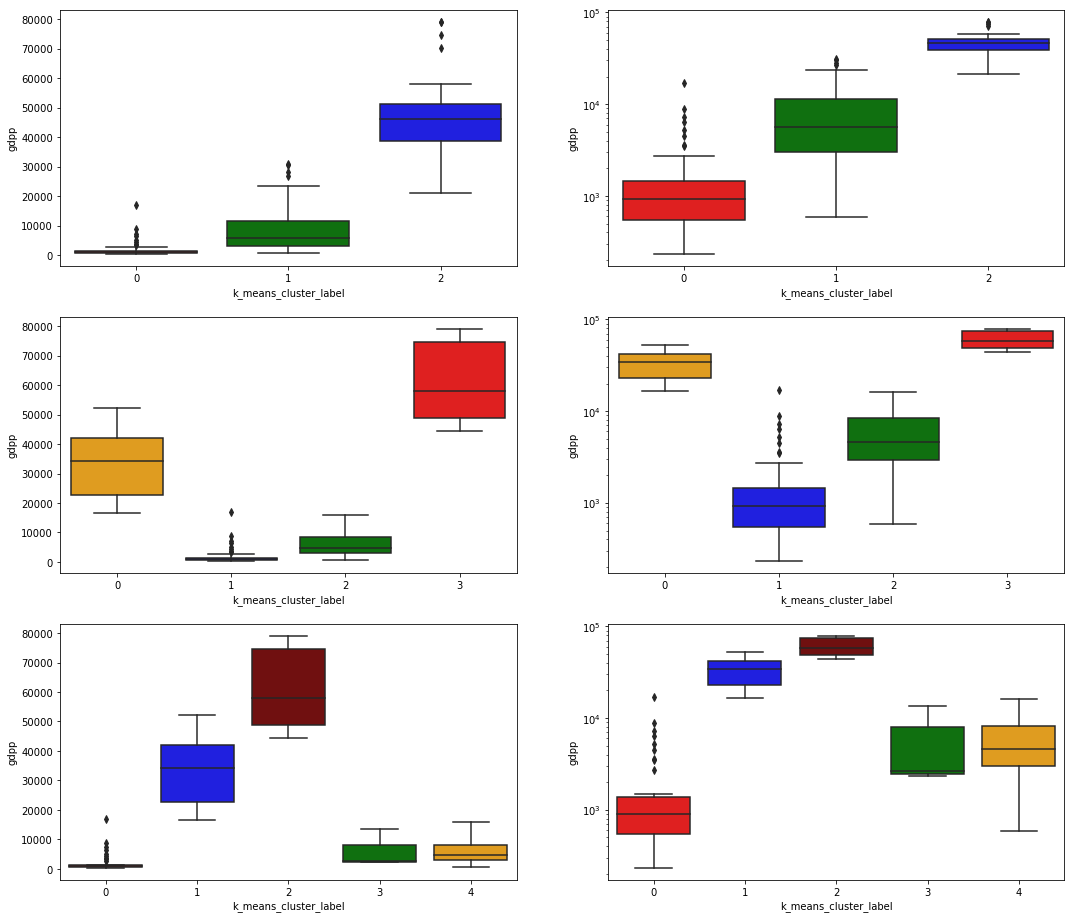

In [42]:
plt.figure(figsize = (18,16))
clusters_box_plots('gdpp',True) # log scaled
plt.show()

**comment**
- First set of 3 plots at the left show the distribution without log scale and the next 3 plots show the distribution with GDPP log scaled
- GDPP of the developed countries are so high that we are unable to see the GDPP of the poor countries properly in this boxplot.
- From the right side 3 plots, it can be seen that GDPP of cluster 0 is in the range of 10000(10^4) and cluster 1 is in 100000(10^5) whereas cluster 2 is in range of 10^3 indicating help
- There is a slight overlap in the clusters when k=5 and k=4

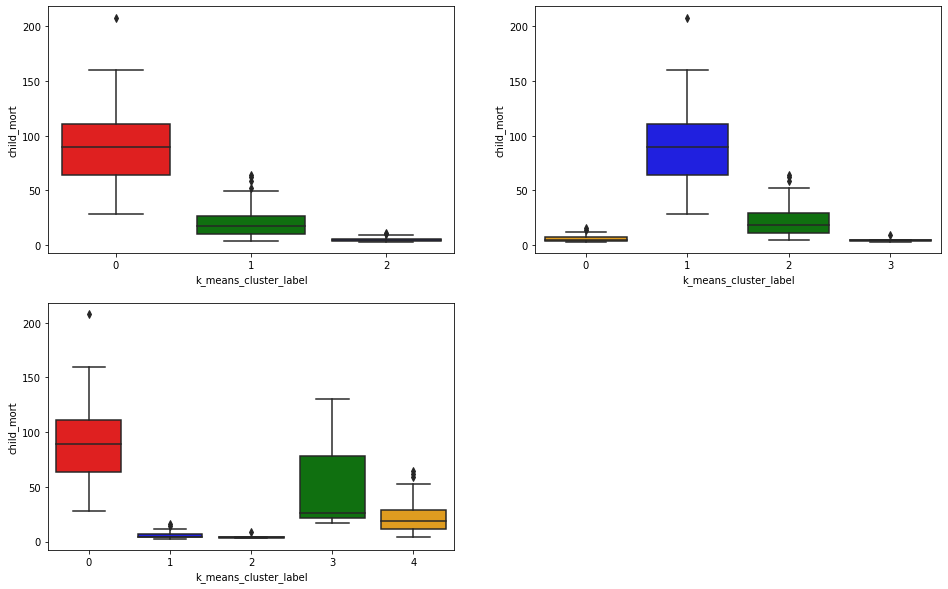

In [43]:
plt.figure(figsize = (16,10))
clusters_box_plots('child_mort')
plt.show()

**comment**
- Child mortality follows the opposite pattern of GDPP and income.
- Clusters which were high on GDPP and income have less child mortality, indicating that these countries have ample amount of money to take care of child mortaliy and health issues.
- We can see that k=3 gives good clusters as the cohesion within the cluster is good and clusters are well separated.

<Figure size 1296x576 with 0 Axes>

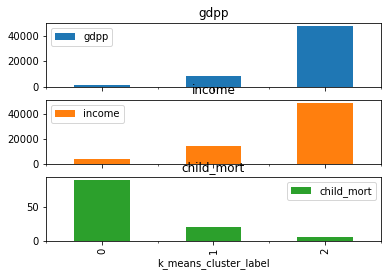

In [44]:
#Visualization of Mean of GDPP, income and Child mortality when k=3,4,5
plt.figure(figsize=(18,8))
grouped_df_k3 = k_3_model[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df_k3.plot.bar(subplots=True)
plt.show()

**comment**:

When K=3, the clusters can be profiled as
- 1 : Medium GDPP, medium Income and mild child mortality rate.
- 2 : High GDPP, High income and very low child mortality rate.
- 0 : Low GDPP, Low income and very high mortality rate.

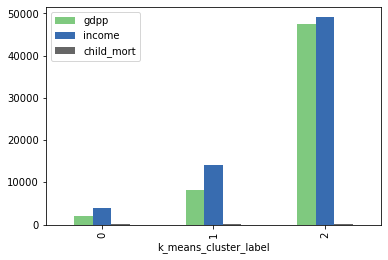

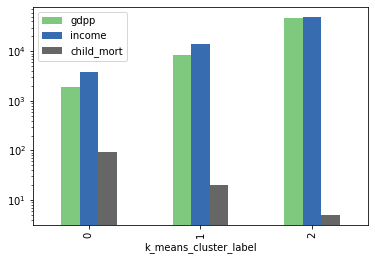

In [45]:
# Profiling GDP, INCOME AND CHID_MORT together

grouped_df_k3.plot(kind='bar', colormap='Accent')    
grouped_df_k3.plot(kind='bar',logy=True, colormap='Accent')    
plt.show()

<Figure size 1296x576 with 0 Axes>

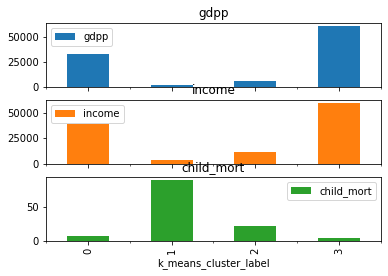

In [46]:
plt.figure(figsize=(18,8))
grouped_df_k4 = k_4_model[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df_k4.plot.bar(subplots=True)
plt.show()

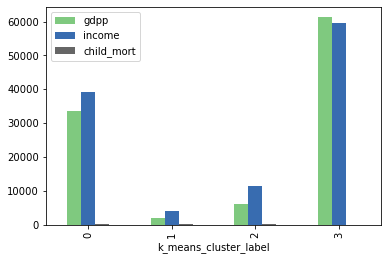

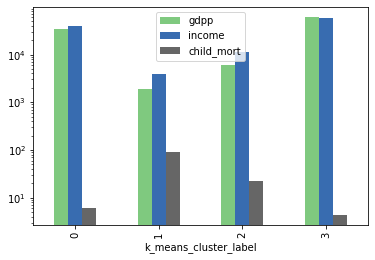

In [47]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df_k4.plot(kind='bar', colormap='Accent')    
grouped_df_k4.plot(kind='bar',logy=True, colormap='Accent')    
plt.show()

<Figure size 1296x576 with 0 Axes>

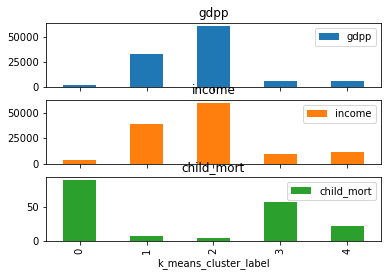

In [48]:
plt.figure(figsize=(18,8))
grouped_df_k5 = k_5_model[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df_k5.plot.bar(subplots=True)
plt.show()

### comment:

- The clusters 1 and 3 are a bit similar and it seems to be in same cluster when k=3 
- Cluster 4 is not effective as its just one country and we cannot compare it with other clusters.So k=5 is not effective for identifying the countries that are in need of aid.

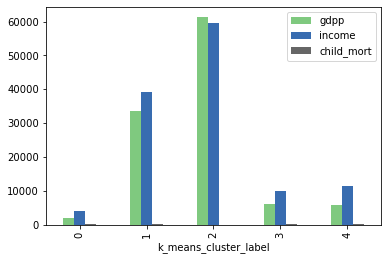

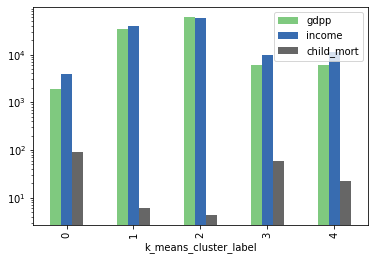

In [49]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df_k5.plot(kind='bar', colormap='Accent')    
grouped_df_k5.plot(kind='bar',logy=True, colormap='Accent')    
plt.show()

In [50]:
k_5_model[k_5_model['k_means_cluster_label']==4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,4
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,4
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,4
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300.0,4
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,4
...,...,...,...,...,...,...,...,...,...,...,...
156,Ukraine,11.7,1398.87,229.284,1517.67,7820.0,13.40,70.4,1.44,2970.0,4
160,Uruguay,10.6,3129.70,993.650,3022.60,17100.0,4.91,76.4,2.08,11900.0,4
161,Uzbekistan,36.3,437.46,80.178,393.30,4240.0,16.50,68.8,2.34,1380.0,4
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950.0,2.62,63.0,3.50,2970.0,4


### Final Model: K-means clustering with K =3 

In [51]:
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(country_df_scaled)

KMeans(n_clusters=3, random_state=50)

In [52]:
country_df_kmean = country_df.copy() # copy df into new df, as the same df will be used for hierarchical clustering too.
label  = pd.DataFrame(kmean.labels_, columns= ['k_means_cluster_label'])
label.head()

,k_means_cluster_label
0,1
1,0
2,0
3,1
4,0


In [53]:
country_df_kmean = pd.concat([country_df_kmean, label], axis =1)
country_df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [54]:
country_df_kmean.k_means_cluster_label.value_counts()

0    92
1    48
2    27
Name: k_means_cluster_label, dtype: int64

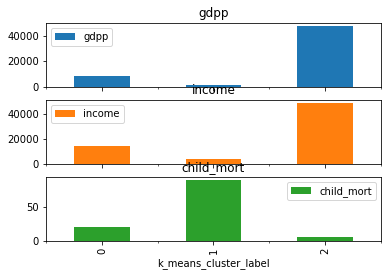

In [55]:
# Profiling GDP, INCOME AND CHID_MORT in separate plots

grouped_df = country_df_kmean[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df.plot.bar(subplots=True)
plt.show()

<AxesSubplot:xlabel='k_means_cluster_label'>

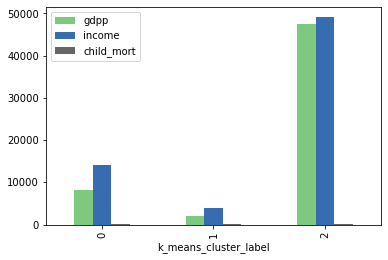

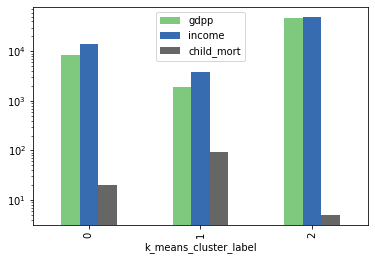

In [56]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df.plot(kind='bar', colormap='Accent')
grouped_df.plot(kind='bar',logy=True, colormap='Accent')

In [57]:
country_df_kmean.loc[country_df_kmean['k_means_cluster_label'] == 0,'k_means_cluster_label'] ='Developing Countries'
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Developing Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,Developing Countries
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,Developing Countries
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,Developing Countries
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300.0,Developing Countries
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,Developing Countries
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.650,3022.60,17100.0,4.91,76.4,2.08,11900.0,Developing Countries
161,Uzbekistan,36.3,437.46,80.178,393.30,4240.0,16.50,68.8,2.34,1380.0,Developing Countries
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950.0,2.62,63.0,3.50,2970.0,Developing Countries
163,Venezuela,17.1,3847.50,662.850,2376.00,16500.0,45.90,75.4,2.47,13500.0,Developing Countries


In [58]:
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Developing Countries'].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565
std,14.095983,3758.035772,623.537749,3463.217447,9474.287745,7.768033,4.097908,0.679580,7140.250011
min,3.200000,1.076920,19.463600,0.651092,1990.000000,-4.210000,63.000000,1.230000,592.000000
25%,10.275000,1003.987500,179.336250,1375.405000,7150.000000,1.735000,70.400000,1.590000,3027.500000
50%,17.150000,1876.810000,366.440000,2370.465000,11300.000000,5.025000,74.100000,2.165000,5645.000000
75%,26.200000,5184.400000,740.455000,5183.775000,19175.000000,9.187500,76.400000,2.642500,11450.000000
max,64.400000,15046.200000,2928.780000,14718.600000,45400.000000,45.900000,81.900000,4.340000,30700.000000


In [59]:
# Developed Countries: High income, High GDP and Low Child_mort
# Filter the data for that clsuter
country_df_kmean.loc[country_df_kmean['k_means_cluster_label'] == 1,'k_means_cluster_label'] ='Developed Countries'
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Developed Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,Developed Countries
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,Developed Countries
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,Developed Countries
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.8800,6350.0,Developed Countries
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,Developed Countries
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,Developed Countries
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,Developed Countries
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,Developed Countries
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,Developed Countries
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,Developed Countries


In [60]:
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Developed Countries'].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.972233,1909.208333
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,15.362485,6.384914,0.995640,2925.911009
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,6.563600,17100.000000


In [61]:
# Under-Developed Countries:Low income, Low GDP and High Child_mort
# Filter the data for that clsuter

country_df_kmean.loc[country_df_kmean['k_means_cluster_label'] == 2,'k_means_cluster_label'] ='Under-Developed Countries'
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Under-Developed Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label
7,Australia,4.8,10276.20,4530.8700,10847.10,41400.0,1.160,82.0,1.93,51900.0,Under-Developed Countries
8,Austria,4.3,24059.70,5159.0000,22418.20,43200.0,0.873,80.5,1.44,46900.0,Under-Developed Countries
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,Under-Developed Countries
23,Brunei,10.5,23792.20,1002.5200,9884.00,80600.0,16.700,77.1,1.84,35300.0,Under-Developed Countries
29,Canada,5.6,13793.40,5356.2000,14694.00,40700.0,2.870,81.3,1.63,47400.0,Under-Developed Countries
42,Cyprus,3.6,15461.60,1838.7600,17710.00,33900.0,2.010,79.9,1.42,30800.0,Under-Developed Countries
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,Under-Developed Countries
53,Finland,3.0,17879.40,4134.9000,17278.80,39800.0,0.351,80.0,1.87,46200.0,Under-Developed Countries
54,France,4.2,10880.80,4831.4000,11408.60,36900.0,1.050,81.4,2.03,40600.0,Under-Developed Countries
58,Germany,4.2,17681.40,4848.8000,15507.80,40400.0,0.758,80.1,1.39,41800.0,Under-Developed Countries


In [62]:
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Under-Developed Countries'].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,5.092593,26440.026667,4363.327807,22045.851111,49057.333333,3.120407,80.462963,1.775185,47476.888889
std,2.319470,16535.307518,2290.539971,13644.366817,16604.947131,4.399902,1.540017,0.293380,14286.719313
min,2.600000,6001.600000,1002.520000,6052.000000,28300.000000,-3.220000,76.500000,1.150000,21100.000000
25%,3.400000,12381.600000,2624.530000,11556.300000,37850.000000,0.803000,79.950000,1.490000,38700.000000
50%,4.300000,24059.700000,4475.530000,17710.000000,42900.000000,1.570000,80.500000,1.870000,46200.000000
75%,5.900000,34389.100000,5257.600000,28639.400000,56550.000000,3.780000,81.450000,1.965000,51100.000000
max,10.800000,64794.260000,8410.330400,55371.390000,84374.000000,16.700000,82.800000,2.210000,79088.000000


In [63]:
profiling_cols = ['gdpp','child_mort','income'] # create a list to store profiling variables

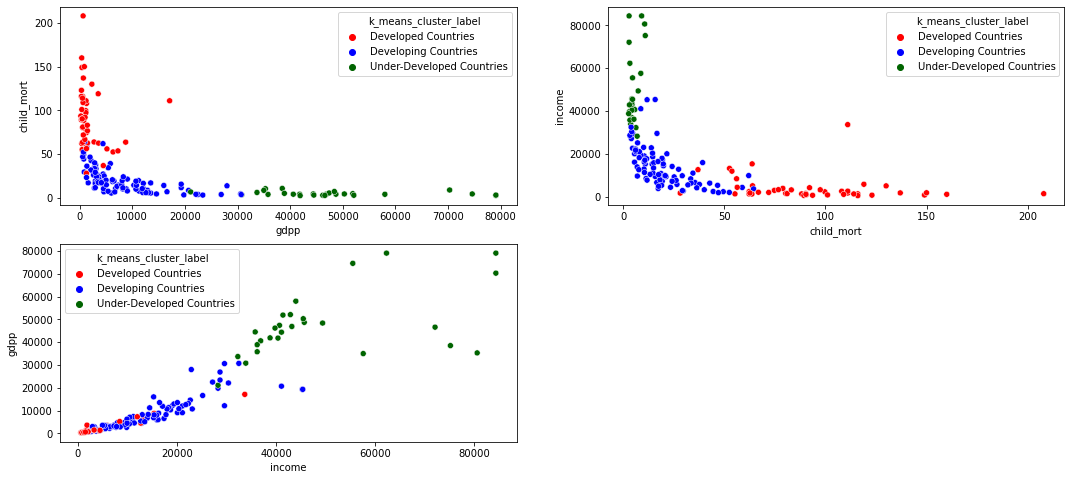

In [64]:
plt.figure(figsize=(18,8))
i=0
for i in range(len(profiling_cols)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x = profiling_cols[i], y = profiling_cols[(i+1)%len(profiling_cols)], hue = 'k_means_cluster_label', data = country_df_kmean, palette=['red','blue','darkgreen'])

### comments:

- Developing countries have Medium GDPP, medium Income and mild child mortality rate.
- Developed countries have High GDPP, High income and very low child mortality rate.
- Under-Developed countries have Low GDPP, Low income and very high mortality rate and should be our primary focus.

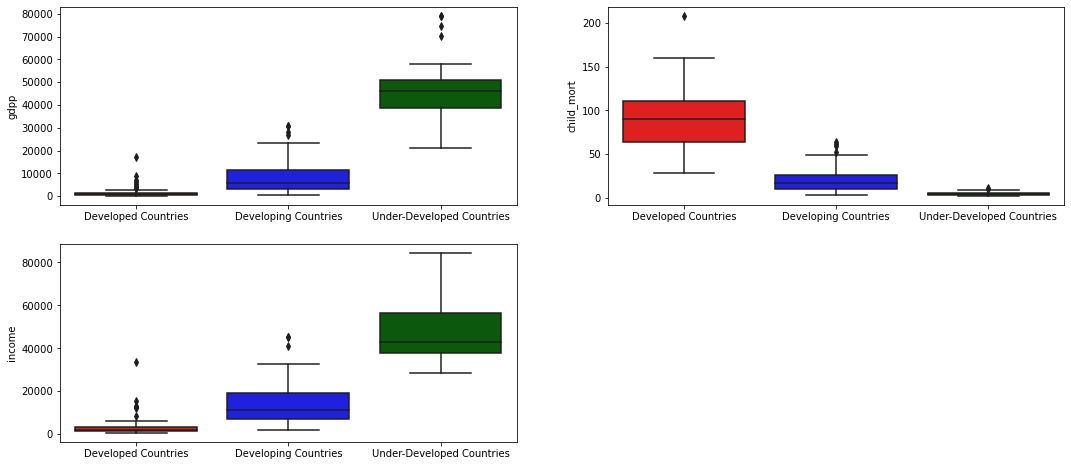

In [65]:
plt.figure(figsize=(18,8))
i=0
for i in range(len(profiling_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'k_means_cluster_label', y = profiling_cols[i], data = country_df_kmean, palette=['red','blue','darkgreen'])
    plt.xlabel('')

**comment**
- Developing countries have Medium GDPP, medium Income and mild child mortality rate.
- Developed countries have High GDPP, High income and very low child mortality rate.
- Under-Developed countries have Low GDPP, Low income and very high mortality rate and should be our primary focus.


<Figure size 1296x576 with 0 Axes>

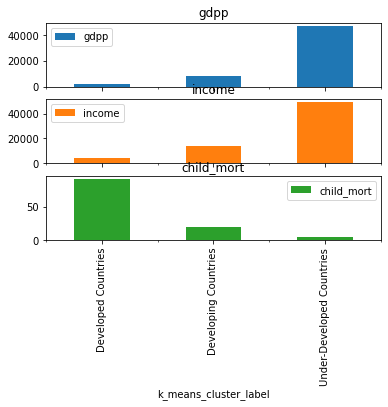

In [66]:
# Profiling GDP, INCOME AND CHID_MORT in sub-plots
plt.figure(figsize=(18,8))
grouped_df = country_df_kmean[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df.plot.bar(subplots=True)
plt.show()

<AxesSubplot:xlabel='k_means_cluster_label'>

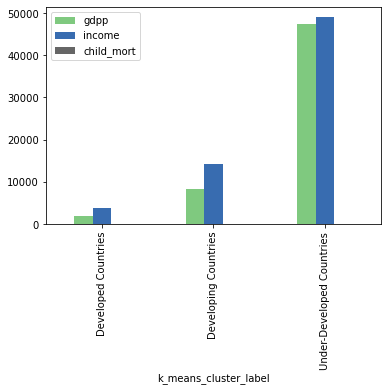

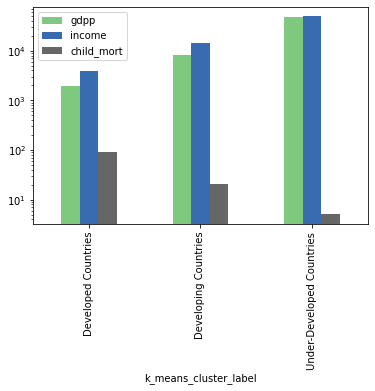

In [67]:
# Profiling GDP, INCOME AND CHID_MORT together from the above grouped_df
grouped_df.plot(kind='bar', colormap='Accent')
grouped_df.plot(kind='bar',logy=True, colormap='Accent')

 ### Identification of Top 10 countries that require aid on priority using K-means algorithm:

In [68]:
K_top10 = country_df_kmean[country_df_kmean['k_means_cluster_label'] =='Under-Developed Countries'].sort_values(['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)
K_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label
98,Malta,6.8,32283.0,1825.15,32494.0,28300.0,3.830,80.3,1.36,21100.0,Under-Developed Countries
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900.0,2.010,79.9,1.42,30800.0,Under-Developed Countries
111,New Zealand,6.2,10211.1,3403.70,9436.0,32300.0,3.730,80.9,2.17,33700.0,Under-Developed Countries
157,United Arab Emirates,8.6,27195.0,1281.00,22260.0,57600.0,12.500,76.5,1.87,35000.0,Under-Developed Countries
23,Brunei,10.5,23792.2,1002.52,9884.0,80600.0,16.700,77.1,1.84,35300.0,Under-Developed Countries
75,Italy,4.0,9021.6,3411.74,9737.6,36200.0,0.319,81.7,1.46,35800.0,Under-Developed Countries
82,Kuwait,10.8,25679.5,1012.55,11704.0,75200.0,11.200,78.2,2.21,38500.0,Under-Developed Countries
158,United Kingdom,5.2,10969.8,3749.96,11981.2,36200.0,1.570,80.3,1.92,38900.0,Under-Developed Countries
54,France,4.2,10880.8,4831.40,11408.6,36900.0,1.050,81.4,2.03,40600.0,Under-Developed Countries
58,Germany,4.2,17681.4,4848.80,15507.8,40400.0,0.758,80.1,1.39,41800.0,Under-Developed Countries


In [69]:
K_top10.country

98                    Malta
42                   Cyprus
111             New Zealand
157    United Arab Emirates
23                   Brunei
75                    Italy
82                   Kuwait
158          United Kingdom
54                   France
58                  Germany
Name: country, dtype: object

# Hierarchical Clustering Algorithm

 ### Linkage Criteria
  - The two most similar parts of a cluster in a **single-linkage**
  - The two least similar bits of a cluster in a **complete-linkage**
  - The center of the clusters in a mean or average-linkage

In [70]:
#Single linkage
country_df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.543736,-0.032042
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.452874,-0.503105,-0.458563,-0.776821,-0.489784,-0.852161,0.373359,-0.563175
163,-0.526514,-0.236420,-0.219189,-0.372256,-0.019971,3.616865,0.546361,-0.316136,0.042765
164,-0.372315,-0.491607,-0.540250,-0.513337,-0.690802,0.409732,0.286958,-0.664231,-0.658699
165,0.448417,-0.539950,-0.552429,-0.577202,-0.691361,1.500916,-0.344633,1.156572,-0.658699


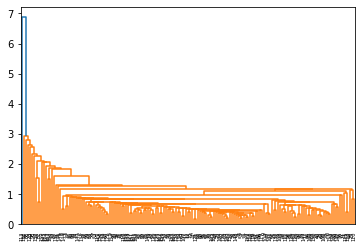

In [71]:
mergings = linkage(country_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

- Single linkage's dendogram is not readable or interpretable. Hence we cannot use this for our problem.


In [72]:
#Complete linkage

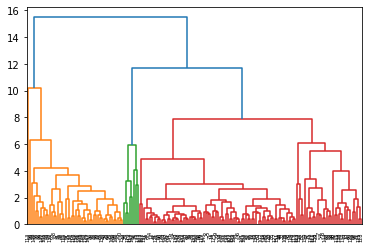

In [73]:
mergings = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

###comment:
- Complete linkage's dendogram is readable and better to interpret when compared to single linkage's dendogram.
- If we cut the dendogram tree at SCORE 5 or 6, we have 4 clusters. But we can see the dissimilarity between 4 clusters and 3 clusters is not much as at score 8 itself, we see 3 clusters forming. Only at higher score of 12, 2 sets of clusters available. 

- This indicates 3 clusters is a good choice as there will be good dissimilarity between clusters and good similarity within clusters.

In [74]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [75]:
# assign cluster labels
country_df['cluster_labels'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [76]:
country_df.cluster_labels.value_counts()

1    111
0     48
2      8
Name: cluster_labels, dtype: int64

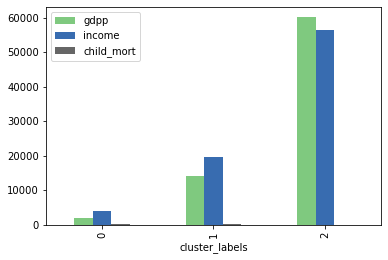

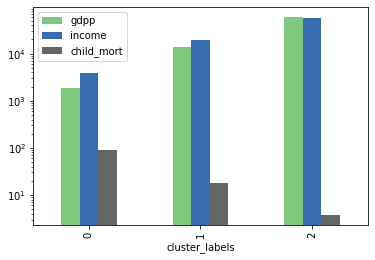

In [77]:
# Profiling GDP, INCOME AND CHID_MORT in separete plots
grouped_df = country_df[['gdpp', 'income', 'child_mort','cluster_labels']].groupby('cluster_labels').mean()
grouped_df.plot(kind='bar', colormap='Accent')    
grouped_df.plot(kind='bar',logy=True, colormap='Accent')    
plt.show()

<AxesSubplot:xlabel='cluster_labels'>

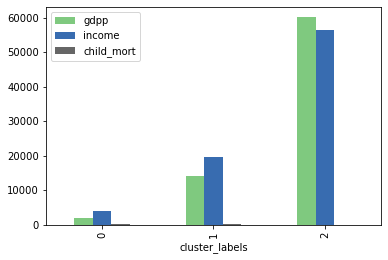

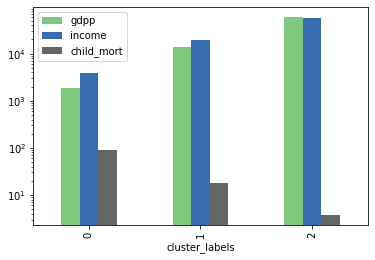

In [78]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df.plot(kind='bar', colormap='Accent')
grouped_df.plot(kind='bar',logy=True, colormap='Accent')

From the above plots, its evident that the cluster labels 
- 0 : Under-developed countries having low GDPP, low income and high child mortality rate.
- 1 : Developing countries having medium GDPP, medium income and mild child mortality rate.
- 2 : Developed countries having high GDPP, high income and very low child mortality rate.

## Countries Segmentation

Lets rename the cluster labels as 
- 0 : Under-developed Countries
- 1 : Developing Countries
- 2 : Developed Countries

In [79]:
# Low income, Low GDP and High Child_mort
# Filter the data for that clsuter

country_df.loc[country_df['cluster_labels'] == 0,'cluster_labels'] ='Under-Developed Countries'
country_df[country_df['cluster_labels'] == 'Under-Developed Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,Under-Developed Countries
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,Under-Developed Countries
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,Under-Developed Countries
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.8800,6350.0,Under-Developed Countries
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,Under-Developed Countries
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,Under-Developed Countries
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,Under-Developed Countries
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,Under-Developed Countries
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,Under-Developed Countries
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,Under-Developed Countries


In [80]:
country_df[country_df['cluster_labels'] == 'Under-Developed Countries'].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.972233,1909.208333
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,15.362485,6.384914,0.995640,2925.911009
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,6.563600,17100.000000


In [81]:
# Medium income, Medium GDP and Mild Child_mort
# Filter the data for that clsuter

country_df.loc[country_df['cluster_labels'] == 1,'cluster_labels'] ='Developing Countries'
country_df[country_df['cluster_labels'] == 'Developing Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,Developing Countries
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,Developing Countries
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,Developing Countries
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300.0,Developing Countries
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,Developing Countries
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.650,3022.60,17100.0,4.91,76.4,2.08,11900.0,Developing Countries
161,Uzbekistan,36.3,437.46,80.178,393.30,4240.0,16.50,68.8,2.34,1380.0,Developing Countries
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950.0,2.62,63.0,3.50,2970.0,Developing Countries
163,Venezuela,17.1,3847.50,662.850,2376.00,16500.0,45.90,75.4,2.47,13500.0,Developing Countries


In [82]:
country_df[country_df['cluster_labels'] == 'Developing Countries'].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,17.686486,6197.379266,1098.913521,5702.860550,19617.693694,6.443802,74.698198,2.151982,14035.783784
std,13.991286,7689.510140,1507.213347,5929.947700,16238.417922,7.432669,4.557331,0.650693,14979.218204
min,2.600000,1.076920,19.463600,0.651092,1990.000000,-4.210000,63.000000,1.230000,592.000000
25%,6.850000,1198.840000,195.479500,1513.755000,7850.000000,1.420000,71.450000,1.580000,3380.000000
50%,14.500000,3124.400000,469.908000,3022.600000,15300.000000,4.220000,74.700000,2.070000,8000.000000
75%,23.700000,9297.200000,1038.195000,8336.650000,28300.000000,8.870000,77.900000,2.600000,19550.000000
max,64.400000,43796.900000,8410.330400,32494.000000,84374.000000,45.900000,82.800000,4.340000,70300.000000


In [83]:
# High income, High GDP and Low Child_mort
# Filter the data for that clsuter

country_df.loc[country_df['cluster_labels'] == 2,'cluster_labels'] ='Developed Countries'
country_df[country_df['cluster_labels'] == 'Developed Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,Developed Countries
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,Developed Countries
73,Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,Developed Countries
91,Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,Developed Countries
110,Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,Developed Countries
114,Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,Developed Countries
133,Singapore,2.8,64794.26,1845.3600,55371.39,72100.0,-0.046,82.7,1.15,46600.0,Developed Countries
145,Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.2,1.52,74600.0,Developed Countries


In [84]:
country_df[country_df['cluster_labels'] == 'Developed Countries'].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,3.825000,45222.215000,6070.207550,38512.335000,56321.750000,1.571125,80.975000,1.727500,60097.000000
std,0.762983,13974.354802,2309.856117,12017.974355,15518.448429,2.773660,1.076701,0.288184,15073.572977
min,2.800000,29290.000000,1845.360000,25023.000000,41100.000000,-3.220000,79.500000,1.150000,44400.000000
25%,3.100000,34622.850000,4681.982500,30315.100000,45125.000000,0.226250,80.300000,1.602500,48175.000000
50%,4.150000,41980.000000,6298.850000,36464.300000,50600.000000,1.364000,80.850000,1.825000,54150.000000
75%,4.500000,53819.315000,8199.735000,45436.972500,64750.000000,3.320000,81.525000,1.890000,75722.000000
max,4.500000,64794.260000,8410.330400,55371.390000,84374.000000,5.950000,82.700000,2.050000,79088.000000


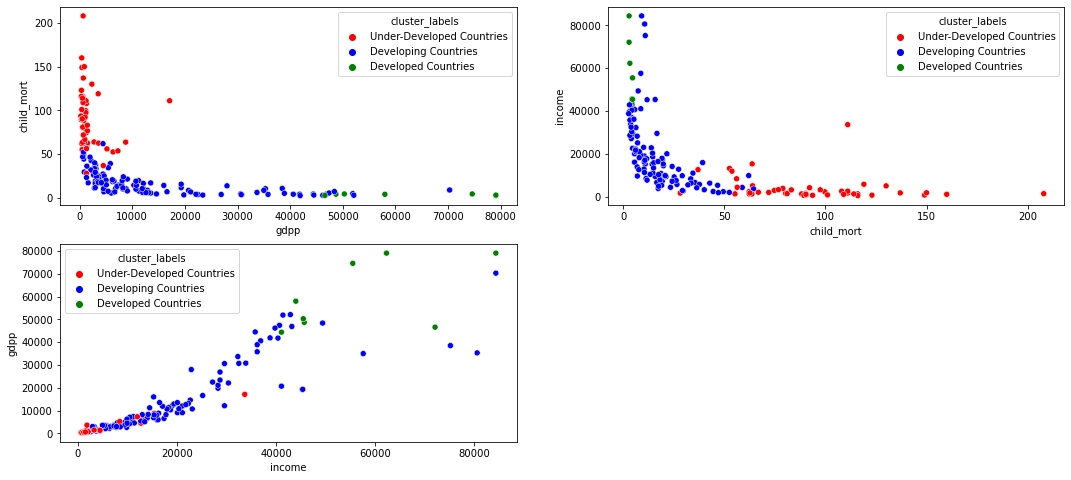

In [85]:
plt.figure(figsize=(18,8))
i=0
for i in range(len(profiling_cols)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x = profiling_cols[i], y = profiling_cols[(i+1)%len(profiling_cols)], hue = 'cluster_labels', data = country_df, palette=['red','blue','green'])

### comment:
- Developing countries have Medium GDPP, medium Income and mild child mortality rate.
- Developed countries have High GDPP, High income and very low child mortality rate.
- Under-Developed countries have Low GDPP, Low income and very high mortality rate and should be our primary focus.

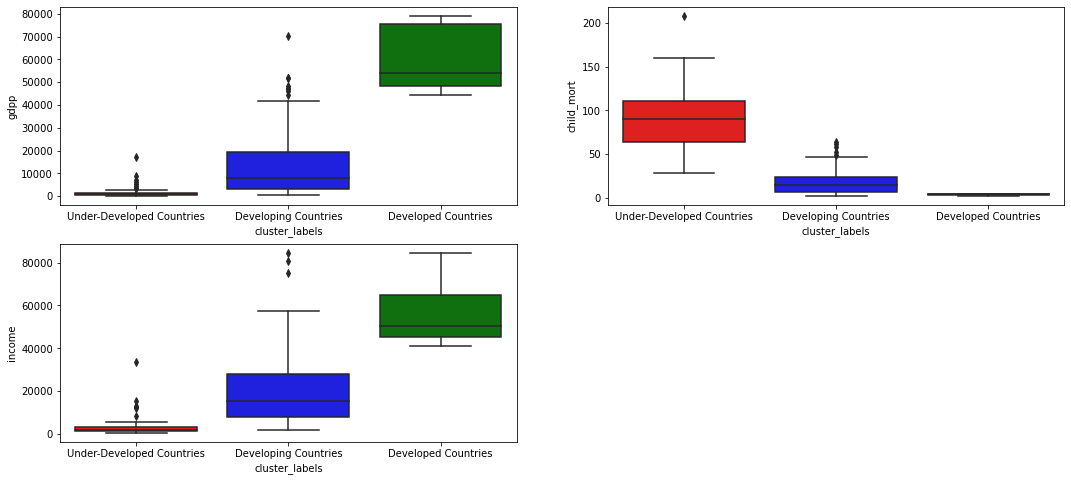

In [86]:
plt.figure(figsize=(18,8))
i=0
for i in range(len(profiling_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'cluster_labels', y = profiling_cols[i], data = country_df, palette=['red','blue','green'])

- Developing countries have Medium GDPP, medium Income and mild child mortality rate.
- Developed countries have High GDPP, High income and very low child mortality rate.
- Under-Developed countries have Low GDPP, Low income and very high mortality rate and should be our primary focus.

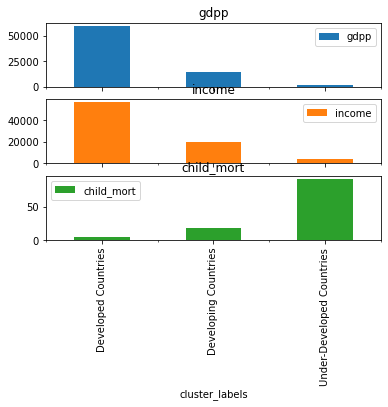

In [87]:
# Profiling GDP, INCOME AND CHID_MORT in sub-plots
grouped_df = country_df[['gdpp', 'income', 'child_mort','cluster_labels']].groupby('cluster_labels').mean()
grouped_df.plot(kind='bar', subplots=True)
plt.show()

<AxesSubplot:xlabel='cluster_labels'>

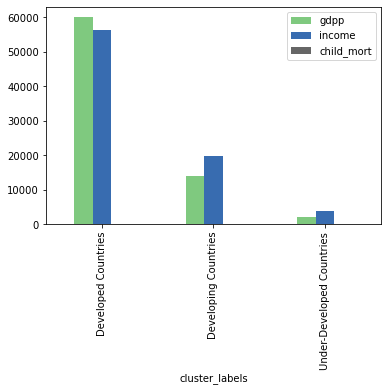

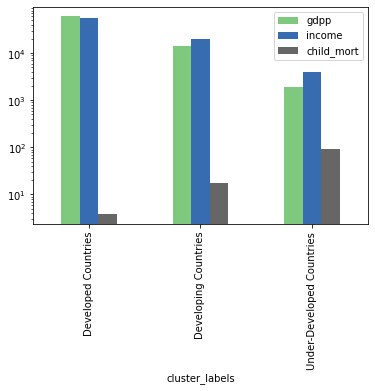

In [88]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df.plot(kind='bar', colormap='Accent')
grouped_df.plot(kind='bar',logy=True, colormap='Accent')

### Identification of Top 10 countries that require aid on priority using Hierarchical clustering:

In [89]:
H_top10 = country_df[country_df['cluster_labels'] =='Under-Developed Countries'].sort_values(by = ['gdpp','child_mort','income'], ascending = [True, False, True]).head(10)
H_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,Under-Developed Countries
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,Under-Developed Countries
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,Under-Developed Countries
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,Under-Developed Countries
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,Under-Developed Countries
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,Under-Developed Countries
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,Under-Developed Countries
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,Under-Developed Countries
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,Under-Developed Countries
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,Under-Developed Countries


In [90]:
H_top10.country

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

In [91]:
list(K_top10.country)==list(H_top10.country)

False

- This indicates both K-means and Hierarchical Clustering returned same list of 10 countries which are in need of aid.

In [92]:
Priority_1_countries = K_top10.head(5)
Priority_1_countries['Aid Priority'] = "Aid Requirement Priority 1"
Priority_1_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label,Aid Priority
98,Malta,6.8,32283.0,1825.15,32494.0,28300.0,3.83,80.3,1.36,21100.0,Under-Developed Countries,Aid Requirement Priority 1
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900.0,2.01,79.9,1.42,30800.0,Under-Developed Countries,Aid Requirement Priority 1
111,New Zealand,6.2,10211.1,3403.70,9436.0,32300.0,3.73,80.9,2.17,33700.0,Under-Developed Countries,Aid Requirement Priority 1
157,United Arab Emirates,8.6,27195.0,1281.00,22260.0,57600.0,12.50,76.5,1.87,35000.0,Under-Developed Countries,Aid Requirement Priority 1
23,Brunei,10.5,23792.2,1002.52,9884.0,80600.0,16.70,77.1,1.84,35300.0,Under-Developed Countries,Aid Requirement Priority 1


In [93]:
Priority_2_countries = K_top10.tail(5)
Priority_2_countries['Aid Priority'] = "Aid Requirement Priority 2"
Priority_2_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label,Aid Priority
75,Italy,4.0,9021.6,3411.74,9737.6,36200.0,0.319,81.7,1.46,35800.0,Under-Developed Countries,Aid Requirement Priority 2
82,Kuwait,10.8,25679.5,1012.55,11704.0,75200.0,11.200,78.2,2.21,38500.0,Under-Developed Countries,Aid Requirement Priority 2
158,United Kingdom,5.2,10969.8,3749.96,11981.2,36200.0,1.570,80.3,1.92,38900.0,Under-Developed Countries,Aid Requirement Priority 2
54,France,4.2,10880.8,4831.40,11408.6,36900.0,1.050,81.4,2.03,40600.0,Under-Developed Countries,Aid Requirement Priority 2
58,Germany,4.2,17681.4,4848.80,15507.8,40400.0,0.758,80.1,1.39,41800.0,Under-Developed Countries,Aid Requirement Priority 2


In [94]:
def results_plots(df_name):
    plt.figure(figsize=[18,6])
    for i,column_name in enumerate(profiling_cols):
        plt.subplot(2,2,i+1)
        ax = sns.barplot(x='country', y=column_name, data= df_name)
        for each_bar in ax.patches:
            ax.annotate(str(each_bar.get_height()), (each_bar.get_x() * 1.01 , each_bar.get_height() * 1.01))
        plt.ylabel(column_name)
        plt.xlabel('Countries which have poor %s' %column_name)

In [95]:
Priority_1_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label,Aid Priority
98,Malta,6.8,32283.0,1825.15,32494.0,28300.0,3.83,80.3,1.36,21100.0,Under-Developed Countries,Aid Requirement Priority 1
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900.0,2.01,79.9,1.42,30800.0,Under-Developed Countries,Aid Requirement Priority 1
111,New Zealand,6.2,10211.1,3403.70,9436.0,32300.0,3.73,80.9,2.17,33700.0,Under-Developed Countries,Aid Requirement Priority 1
157,United Arab Emirates,8.6,27195.0,1281.00,22260.0,57600.0,12.50,76.5,1.87,35000.0,Under-Developed Countries,Aid Requirement Priority 1
23,Brunei,10.5,23792.2,1002.52,9884.0,80600.0,16.70,77.1,1.84,35300.0,Under-Developed Countries,Aid Requirement Priority 1


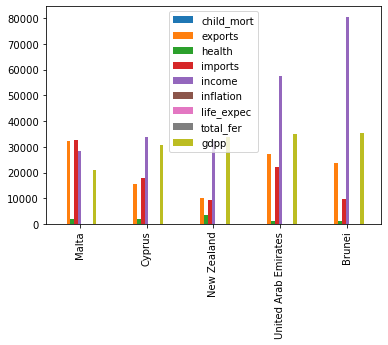

In [96]:
Priority_1_countries.set_index('country').plot(kind='bar')
plt.xlabel('')
plt.show()

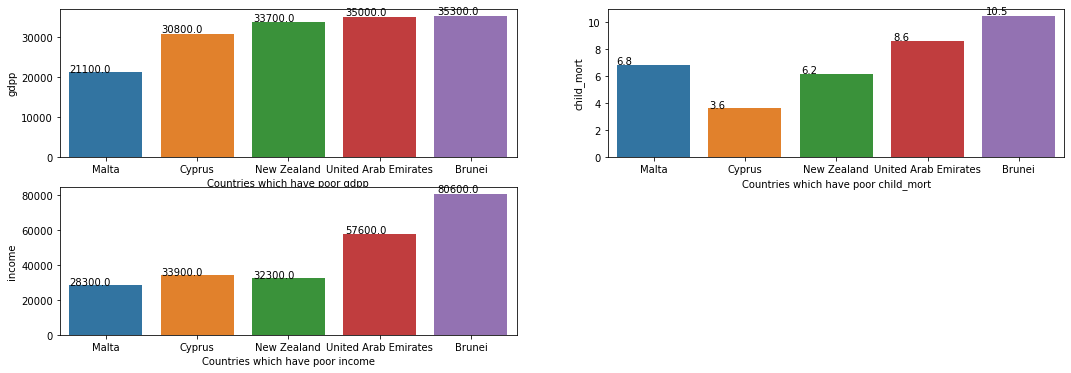

In [97]:
results_plots(Priority_1_countries)

In [98]:
Priority_2_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label,Aid Priority
75,Italy,4.0,9021.6,3411.74,9737.6,36200.0,0.319,81.7,1.46,35800.0,Under-Developed Countries,Aid Requirement Priority 2
82,Kuwait,10.8,25679.5,1012.55,11704.0,75200.0,11.200,78.2,2.21,38500.0,Under-Developed Countries,Aid Requirement Priority 2
158,United Kingdom,5.2,10969.8,3749.96,11981.2,36200.0,1.570,80.3,1.92,38900.0,Under-Developed Countries,Aid Requirement Priority 2
54,France,4.2,10880.8,4831.40,11408.6,36900.0,1.050,81.4,2.03,40600.0,Under-Developed Countries,Aid Requirement Priority 2
58,Germany,4.2,17681.4,4848.80,15507.8,40400.0,0.758,80.1,1.39,41800.0,Under-Developed Countries,Aid Requirement Priority 2


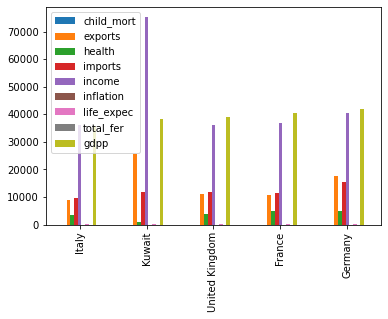

In [99]:
Priority_2_countries.set_index('country').plot(kind='bar')
plt.xlabel('')
plt.show()

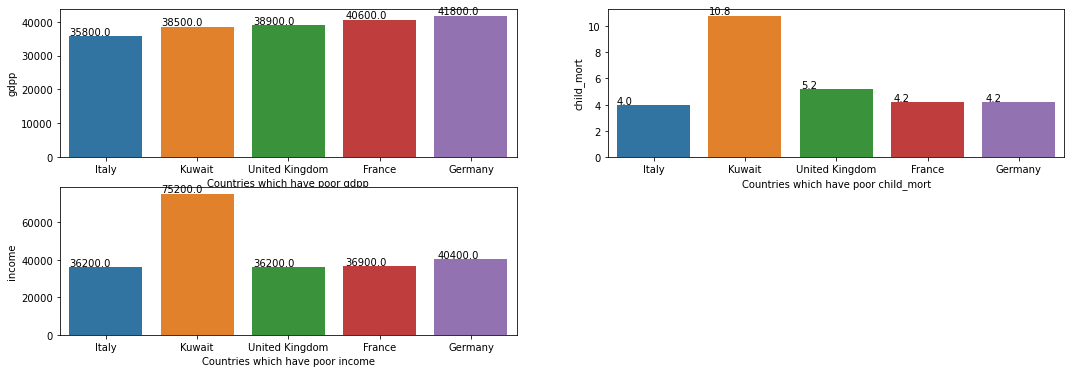

In [100]:
results_plots(Priority_2_countries)

## Suggestion for CEO of NGO
The following 5 are the countries which have to be provided aid first:

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone

Once the above countries are provided with Aid, the following are the next set of countries which would require aid in order to reduce the child mortality rate and improve their GDPP and income per person:

6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea